In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Spam_SMS_Detection/spam.csv", encoding='latin-1')  # Western European characters

# shape of data
print(data.shape)

data.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# create a new data frame with column v1 and v2.
train_data = pd.DataFrame({'v1': data['v1'], 'v2': data['v2']})


In [ ]:
# rename columns v1 & v2 as type & msg respective

train_data.rename(columns={'v1': 'type', 'v2': 'msg'}, inplace=True)
train_data.head(5)

,type,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# get all distinctive values counts.

train_data['type'].value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
# Extract spma and ham messages

spam_lst = train_data[train_data.type == 'spam']
ham_lst = train_data[train_data.type == 'ham']

In [ ]:
# describe any one of the lis.
ham_lst.describe()

,type,msg
count,4825,4825
unique,1,4516
top,ham,"Sorry, I'll call later"
freq,4825,30


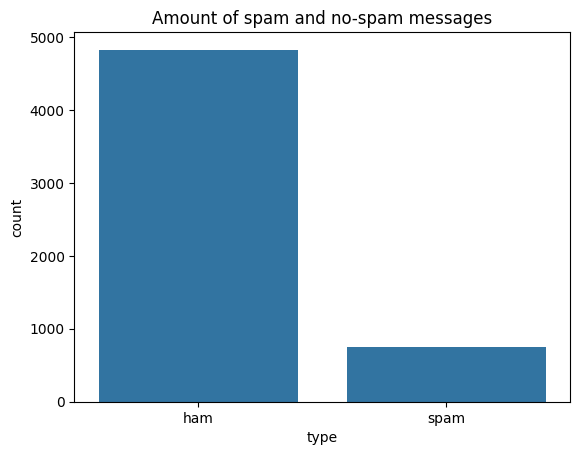

In [ ]:
# plot count chart of spam and ham.

sns.countplot(data = train_data , x= train_data["type"]).set_title("Amount of spam and no-spam messages")
plt.show()


In [ ]:
# for i in range(0, 5572):
#   review = re.sub('[^a-zA-Z]','',train_data['msg'][i])
#   review = review.lower()
#   review = review.split()
#   ps = PorterStemmer()

In [ ]:
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(train_data.msg ,train_data.type,test_size=0.2,random_state=0)

print("data_train, labels_train : ",X_train.shape, y_train.shape)
print("data_test, labels_test: ",X_test.shape, y_test.shape)

data_train, labels_train :  (4457,) (4457,)
data_test, labels_test:  (1115,) (1115,)


In [ ]:

vectorizer = CountVectorizer()
# vectorizer.fit(X_train)
X_train_count = vectorizer.fit_transform(X_train)
y_test_count  = vectorizer.transform(y_test)

In [ ]:
# implementation naive bayes model

mnb_model = MultinomialNB()
mnb_model.fit(X_train_count, y_train)
predictions = mnb_model.predict(y_test_count)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
# just checking prediction accuracy

print ("accuracy_score : ", accuracy_score(y_test, predictions))

accuracy_score :  0.8511210762331839


**we get 85% accuracy which is great for model. generally accuracy above 75% consider as great accuracy score.**

In [ ]:
# this is report.

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       949
        spam       0.00      0.00      0.00       166

    accuracy                           0.85      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.72      0.85      0.78      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
